## Question 2

### Preparing the data

In [12]:
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# np.set_printoptions(threshold=np.inf)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [48]:
movies = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\movies.csv')
ratings = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\ratings.csv')
movieRating = ratings.merge(movies, left_on='movieId', right_on='movieId')

In [32]:
from sklearn.cluster import KMeans

In [82]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
user_movie_ratings.iloc[:6, :10]


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
top_1000_movies = pd.DataFrame()
top_1000_movies["title"] = movieRating['title'].value_counts().index.tolist()[:1000]
reviews_for_top_1000 = top_1000_movies.merge(movieRating, left_on='title', right_on='title')
reviews_for_top_1000

,title,userId,movieId,rating,timestamp,genres,count
0,Forrest Gump (1994),1,356,4.0,964980962,Comedy|Drama|Romance|War,NaN
1,Forrest Gump (1994),6,356,5.0,845553200,Comedy|Drama|Romance|War,NaN
2,Forrest Gump (1994),7,356,5.0,1106635915,Comedy|Drama|Romance|War,NaN
3,Forrest Gump (1994),8,356,3.0,839463527,Comedy|Drama|Romance|War,NaN
4,Forrest Gump (1994),10,356,3.5,1455301685,Comedy|Drama|Romance|War,NaN
...,...,...,...,...,...,...,...
61254,Buffy the Vampire Slayer (1992),489,3264,3.0,1333232795,Action|Comedy|Horror,NaN
61255,Buffy the Vampire Slayer (1992),539,3264,3.5,1332474537,Action|Comedy|Horror,NaN
61256,Buffy the Vampire Slayer (1992),571,3264,1.0,966900418,Action|Comedy|Horror,NaN
61257,Buffy the Vampire Slayer (1992),599,3264,2.5,1498518521,Action|Comedy|Horror,NaN


In [158]:
predictions = KMeans(n_clusters=20, algorithm='full').fit(movieRating[['movieId', 'rating']])
predictions.cluster_centers_

array([[4.45137044e+03, 3.55851499e+00],
       [5.97824309e+04, 3.75782038e+00],
       [1.11602342e+05, 3.87653374e+00],
       [3.90760309e+04, 3.62548263e+00],
       [8.94792880e+04, 3.76000000e+00],
       [1.30602452e+03, 3.77109591e+00],
       [1.50532207e+05, 3.92241379e+00],
       [7.37183333e+04, 3.73917749e+00],
       [4.69083628e+04, 3.76574213e+00],
       [7.19688801e+03, 3.68272043e+00],
       [3.25380143e+04, 3.55124777e+00],
       [1.35720115e+05, 3.90983607e+00],
       [1.22374463e+05, 3.82046332e+00],
       [5.37095195e+04, 3.66364461e+00],
       [9.81748875e+04, 3.68711656e+00],
       [2.61777282e+03, 3.58985094e+00],
       [8.02040422e+04, 3.89204545e+00],
       [6.80833920e+04, 3.82018111e+00],
       [1.65375660e+05, 3.95283019e+00],
       [3.54658808e+02, 3.56631003e+00]])

In [159]:
sse = []
k_rng = range(10,40)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(movieRating[['rating', 'movieId']])
    sse.append(km.inertia_)

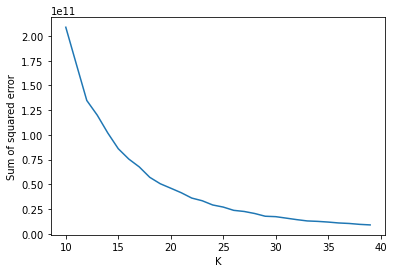

In [160]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

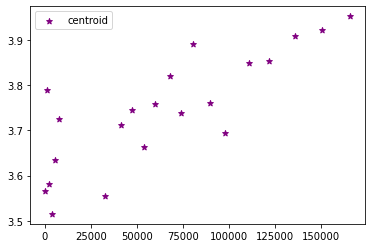

In [166]:
km = KMeans(n_clusters=21, algorithm='full').fit(movieRating[['movieId', 'rating']])
movieRating['cluster']=km
df1 = movieRating[movieRating.cluster==0]
df2 = movieRating[movieRating.cluster==1]
df3 = movieRating[movieRating.cluster==2]
plt.scatter(df1.movieId,df1['rating'],color='green')
plt.scatter(df2.movieId,df2['rating'],color='red')
plt.scatter(df3.movieId,df3['rating'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()